## Project name and type
# Retail Sales Prediciton using Regression

##Collaboration - Individual
##name - Siddique Aslam

#summary
Retail sales prediction is the process of forecasting future sales in the retail industry based on historical data, market trends, and various predictive models. This activity is essential for retailers to make informed decisions regarding inventory management, marketing strategies, and overall business planning.  



#project description
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.  
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

#data description
Rossmann Stores Data.csv - historical data including Sales  
store.csv - supplemental information about the stores  
Data fields:  
Most of the fields are self-explanatory. The following are descriptions for those that aren't.  
Id - an Id that represents a (Store, Date) duple within the test set  
Store - a unique Id for each store  
Sales - the turnover for any given day (this is what you are predictin)  
Customers - the number of customers on a given day  
Open - an indicator for whether the store was open: 0 = closed, 1 = open  
StateHoliday - indicates a state holiday. Normally all stores, with few   exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None  
SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools  
StoreType - differentiates between 4 different store models: a, b, c, d  
Assortment - describes an assortment level: a = basic, b = extra, c = extended
CompetitionDistance - distance in meters to the nearest competitor store  
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened  
Promo - indicates whether a store is running a promo on that day   
Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2  
PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
#importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
# mounting from the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the data
rossman_df=pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')
rossman_df.head()

<ipython-input-3-342584fb2085>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman_df=pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rossman_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
rossman_df.shape

(1017209, 9)

In [ ]:
# summary of data
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
rossman_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
rossman_df.duplicated().any()

False

In [ ]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# finding is their any missing values
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

great there is no null values here

In [ ]:
# counting unique value of each and every vaiables
for var in rossman_df.columns:
  unique_values=rossman_df[var].value_counts()
  print(unique_values)

1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64
2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64
0       172869
560       2414
576       2363
603       2337
571       2330
         ...  
4815         1
3998         1
4210         1
4920         1
4065         1
Name: Customers, Length: 4086, dtype: int64
1    844392
0    172817
Name: Open, dtype: int64
0  

here we see that 0 in stateholiday are two times so we make it to show only 1 times

In [ ]:
rossman_df['StateHoliday']=rossman_df['StateHoliday'].apply(lambda x:0 if x=='0' else x)
rossman_df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

##plot the variables

<Axes: title={'center': 'scatterplot of sales variable'}, ylabel='Sales'>

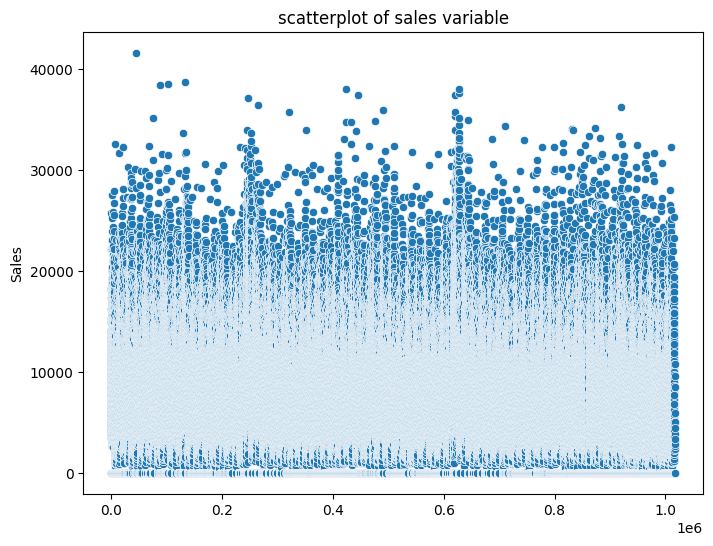

In [ ]:
plt.figure(figsize=(8,6))
plt.title('scatterplot of sales variable')
sns.scatterplot(rossman_df['Sales'])


<Axes: xlabel='StateHoliday', ylabel='Customers'>

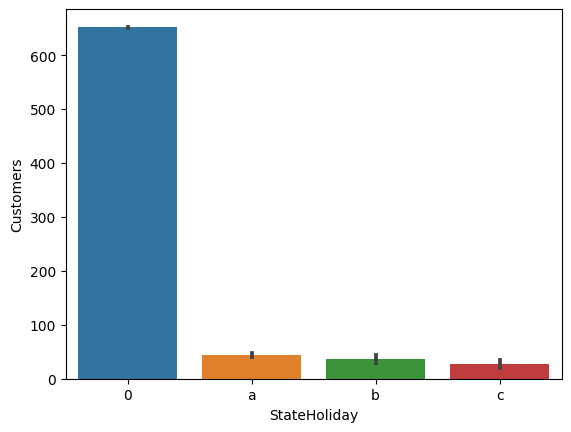

In [ ]:
sns.barplot(x='StateHoliday',y='Customers',data=rossman_df)

<Axes: xlabel='StateHoliday', ylabel='Sales'>

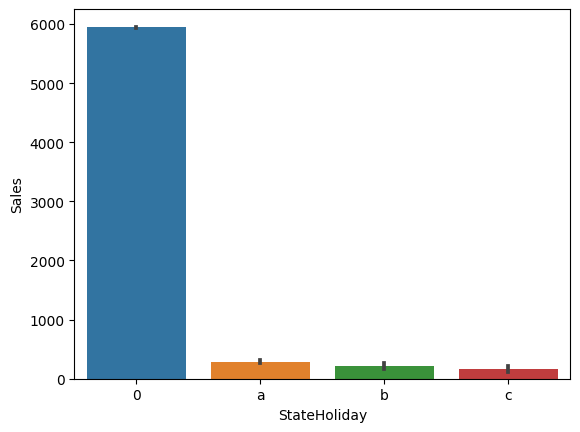

In [ ]:
sns.barplot(x='StateHoliday',y='Sales',data=rossman_df)

In [ ]:
# Replacing 'a', 'b' and 'c' with 1
rossman_df.StateHoliday.replace({'a': 1,
                                'b' : 1,
                                'c' : 1
                                }, inplace = True )

In [ ]:
rossman_df['StateHoliday'].value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

In [ ]:
# extracting datetime data
rossman_df['year']=pd.to_datetime(rossman_df['Date']).dt.year
rossman_df['month']=pd.to_datetime(rossman_df['Date']).dt.month
rossman_df['day']=pd.to_datetime(rossman_df['Date']).dt.day
rossman_df['Week_of_year']=pd.to_datetime(rossman_df['Date']).dt.weekofyear

<ipython-input-9-293ae533e107>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  rossman_df['Week_of_year']=pd.to_datetime(rossman_df['Date']).dt.weekofyear


<Axes: xlabel='StateHoliday', ylabel='Sales'>

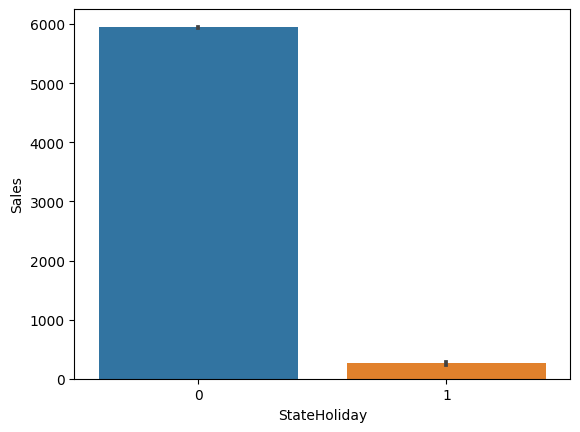

In [ ]:
# observing the plot between varibles
sns.barplot(x=rossman_df['StateHoliday'],y=rossman_df['Sales'])

<Axes: xlabel='SchoolHoliday', ylabel='Sales'>

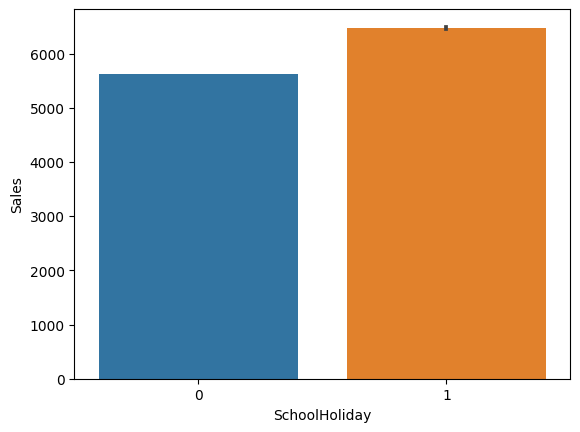

In [ ]:
sns.barplot(x='SchoolHoliday',y='Sales',data=rossman_df)

<Axes: xlabel='StateHoliday', ylabel='Customers'>

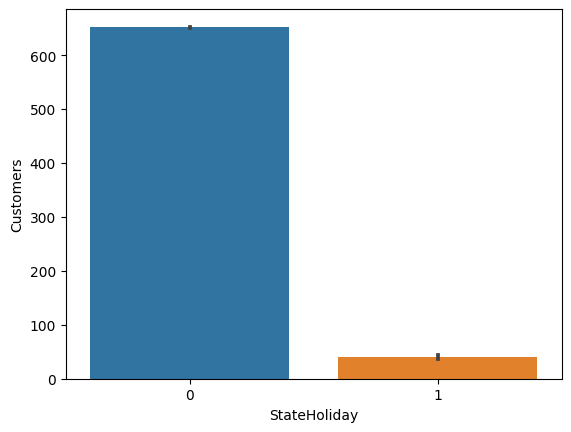

In [ ]:
sns.barplot(x='StateHoliday',y='Customers',data=rossman_df)

<Axes: xlabel='SchoolHoliday', ylabel='Customers'>

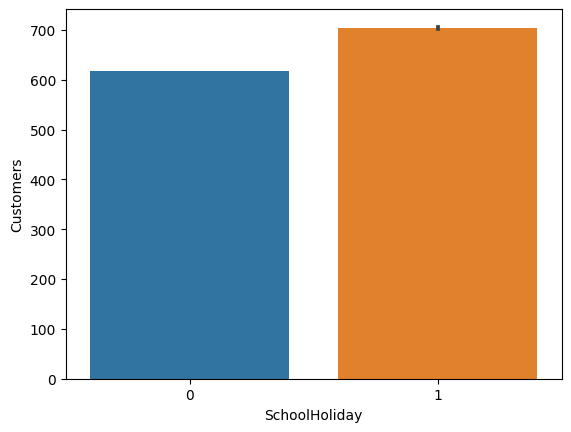

In [ ]:
sns.barplot(x='SchoolHoliday',y='Customers',data=rossman_df)

<Axes: xlabel='Open', ylabel='count'>

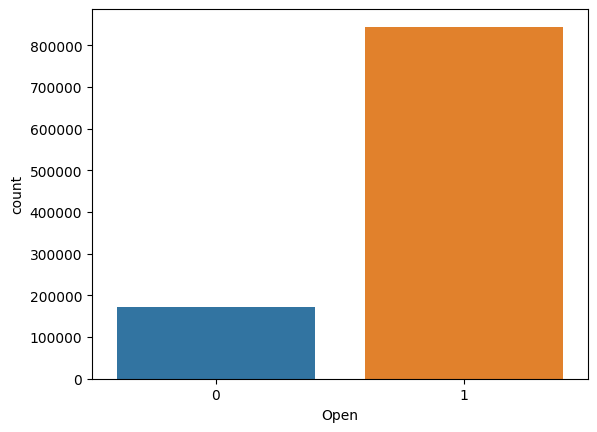

In [ ]:
sns.countplot(x='Open',data=rossman_df)

<Axes: xlabel='Open', ylabel='count'>

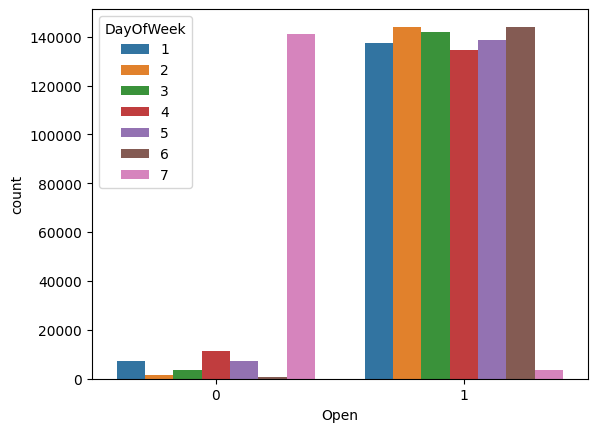

In [ ]:
sns.countplot(x='Open',hue='DayOfWeek',data=rossman_df)

here this plot shows the most of times stores closed on day 7 i.e, sunday

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

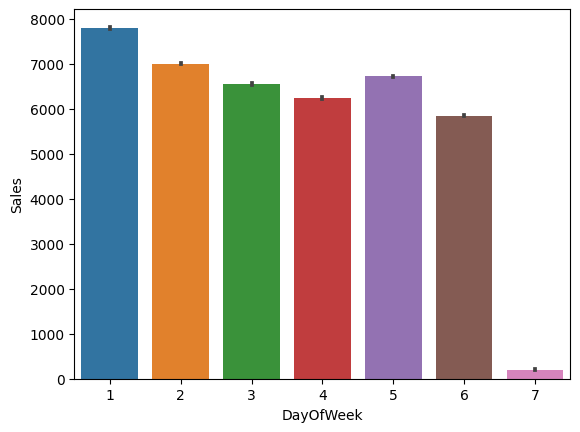

In [ ]:
sns.barplot(x='DayOfWeek',y='Sales',data=rossman_df)

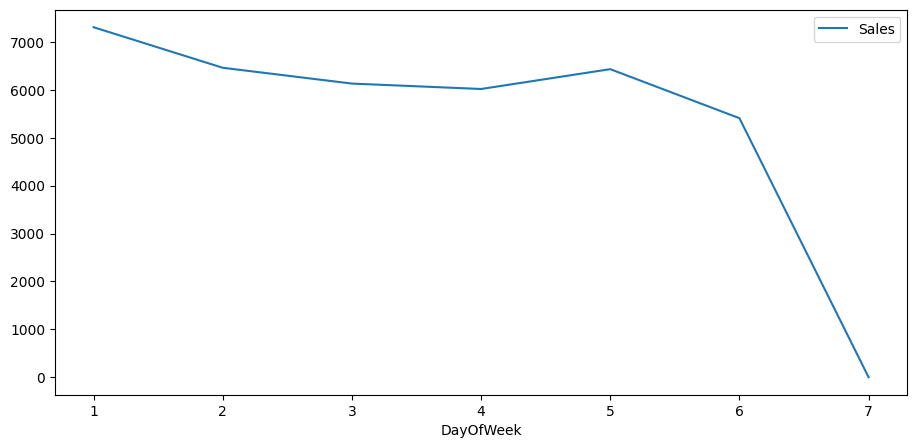

In [ ]:
sales_vs_day= rossman_df.groupby('DayOfWeek')[['Sales']].median().plot(figsize = (11,5))


<Axes: xlabel='DayOfWeek', ylabel='Customers'>

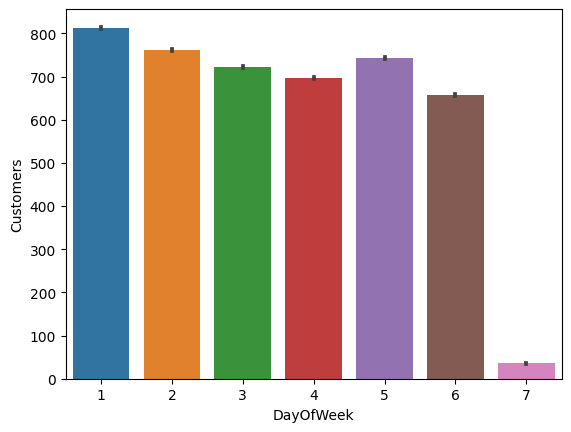

In [ ]:
sns.barplot(x='DayOfWeek',y='Customers',data=rossman_df)

most of the sales are done on first 6 days and on 7th day it shows the minimum sales

<Axes: title={'center': 'Sales'}, xlabel='year'>

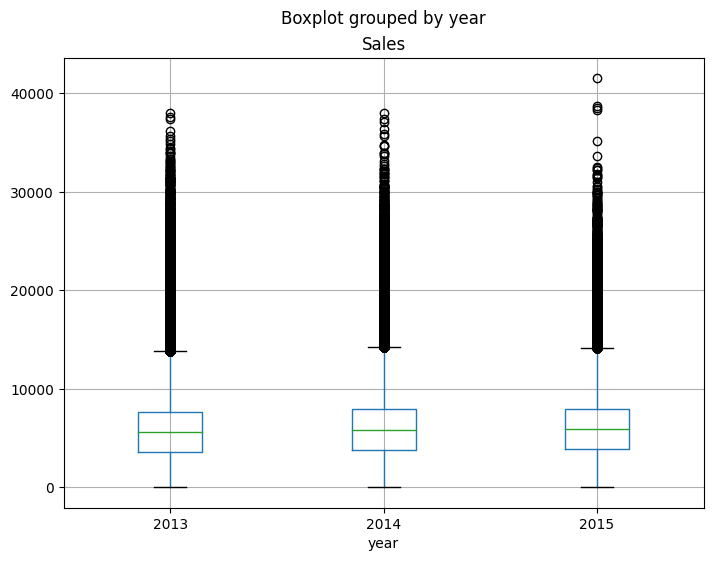

In [ ]:
rossman_df.boxplot('Sales','year',figsize=(8,6))

from these graph we can see that there is no outliers in this variable

<Axes: title={'center': 'Sales'}, xlabel='month'>

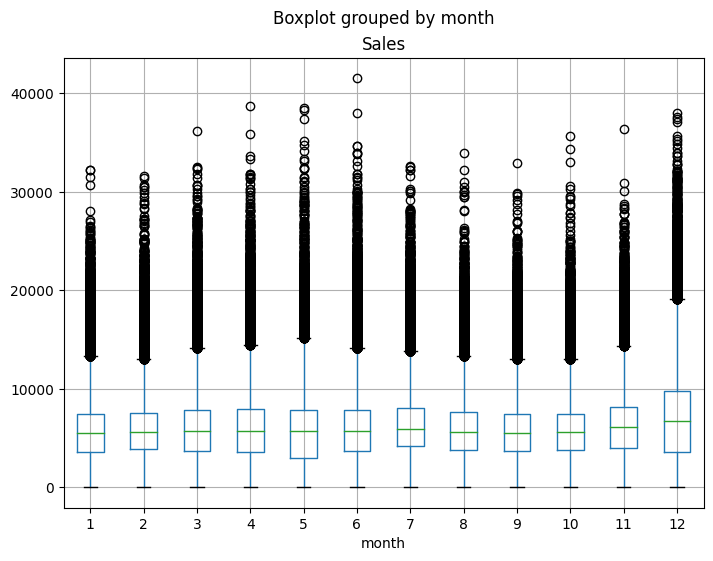

In [ ]:
rossman_df.boxplot('Sales','month',figsize=(8,6))

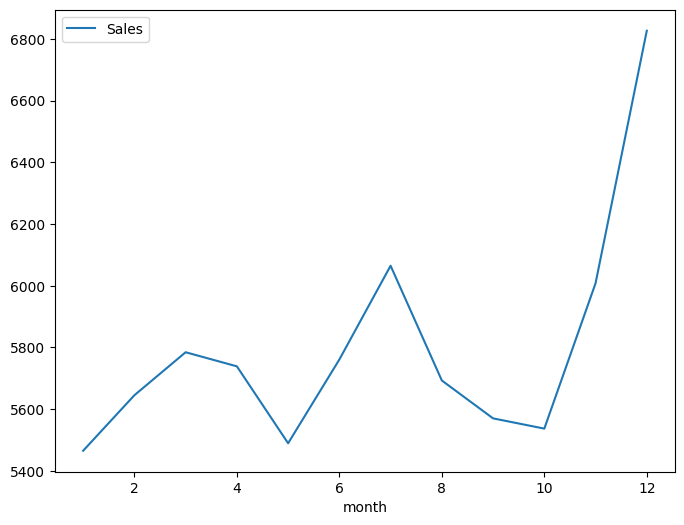

In [ ]:
sales_vs_month=rossman_df.groupby('month')[['Sales']].mean().plot(figsize=(8,6))

here clearly observe that the sales increase in last month of a year

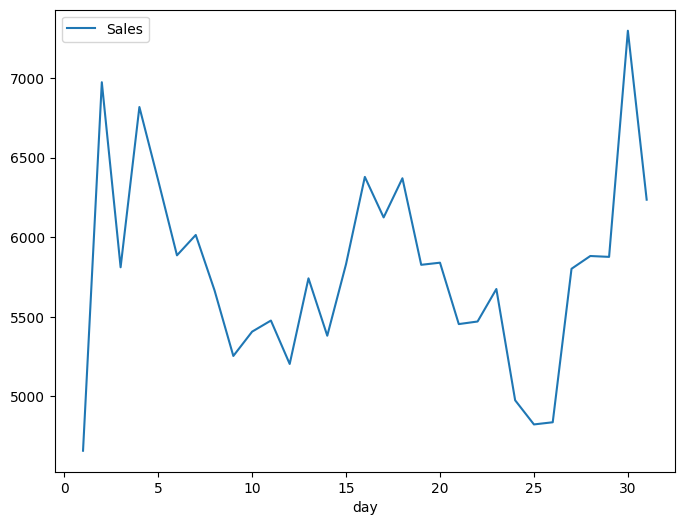

In [ ]:
# trend of avg sales per day of month
avg_sales_vs_day=rossman_df.groupby('day')[['Sales']].mean().plot(figsize=(8,6))

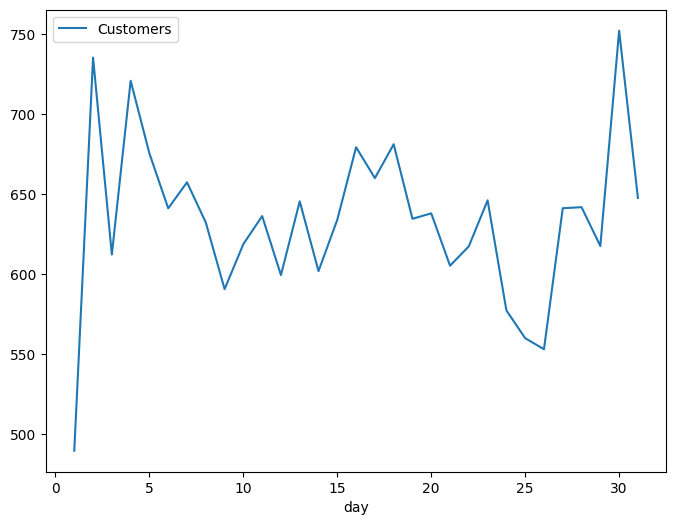

In [ ]:
# trend of avg customers per day of month
avg_cust_vs_day=rossman_df.groupby('day')[['Customers']].mean().plot(figsize=(8,6))

In [ ]:
# dropping 0 in open because it shows that store is closed
new_ross_df=rossman_df[rossman_df['Open']!=0]

In [ ]:
# dropping the open column from data
new_ross_df.drop('Open',axis=1,inplace=True)

<ipython-input-11-86e50b447053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ross_df.drop('Open',axis=1,inplace=True)


In [ ]:
rossman_data=new_ross_df.copy()

<ipython-input-13-2e7672be8241>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rossman_data['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

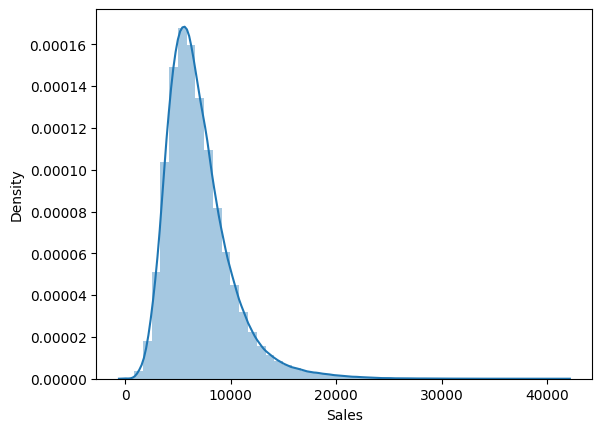

In [ ]:
sns.distplot(rossman_data['Sales'])

we can see here that the spike coming before has gone now after droping closed store

In [ ]:
rossman_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  int64 
 7   SchoolHoliday  844392 non-null  int64 
 8   year           844392 non-null  int64 
 9   month          844392 non-null  int64 
 10  day            844392 non-null  int64 
 11  Week_of_year   844392 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 83.7+ MB


In [ ]:
# creating a list of all numerical feature
num_features=list(rossman_data.describe().columns)

# removing store id and sales
num_features.remove('Store')
num_features.remove('Sales')

num_features

['DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'year',
 'month',
 'day',
 'Week_of_year']

relationship between numerical features and target variable

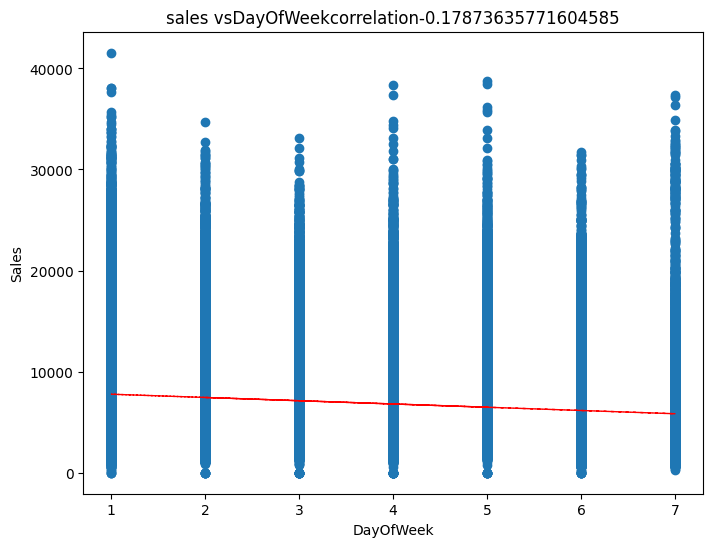

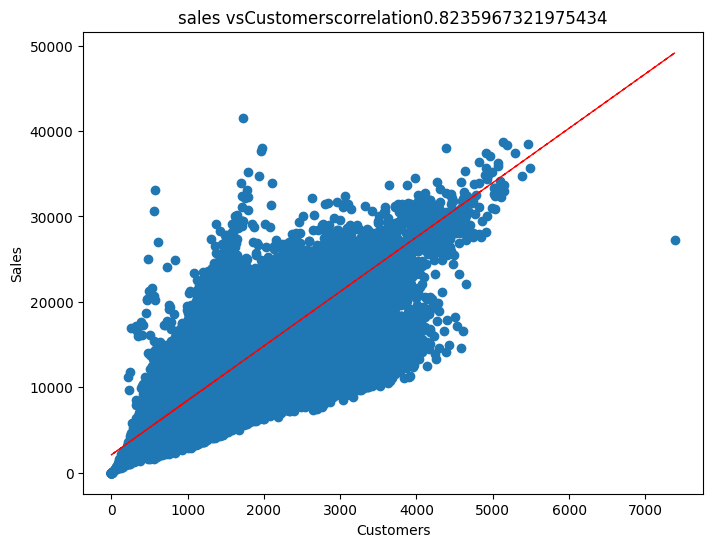

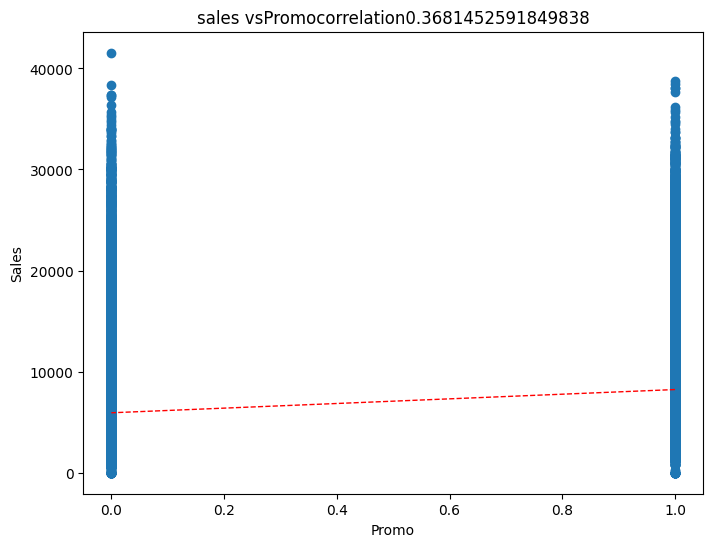

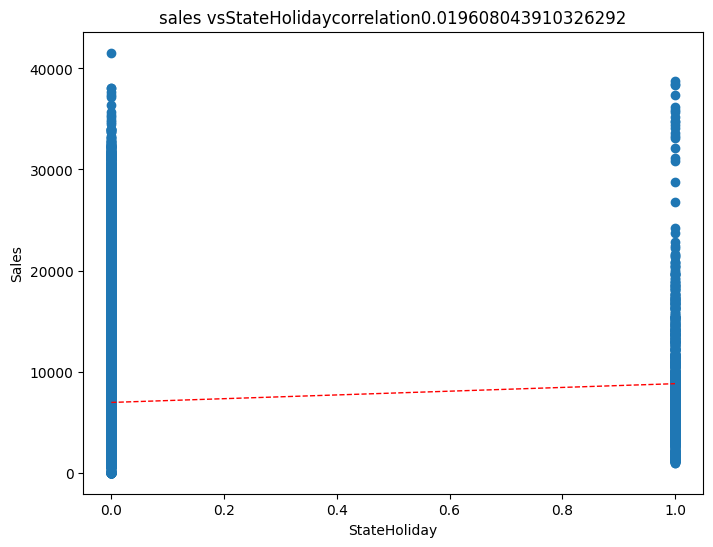

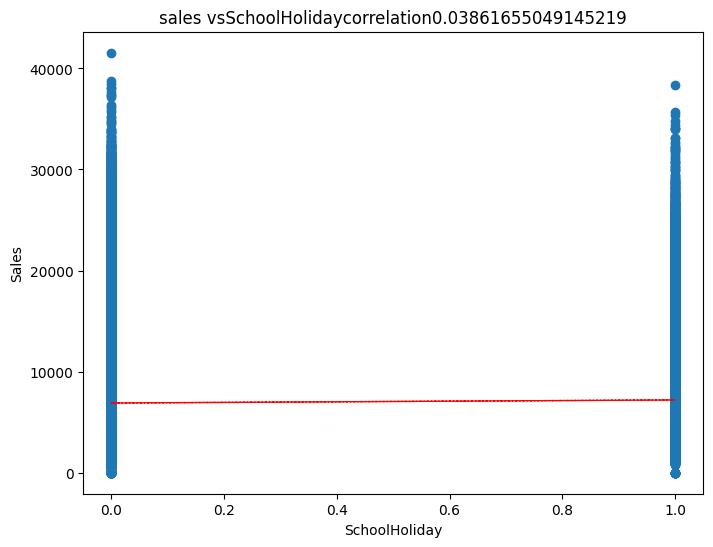

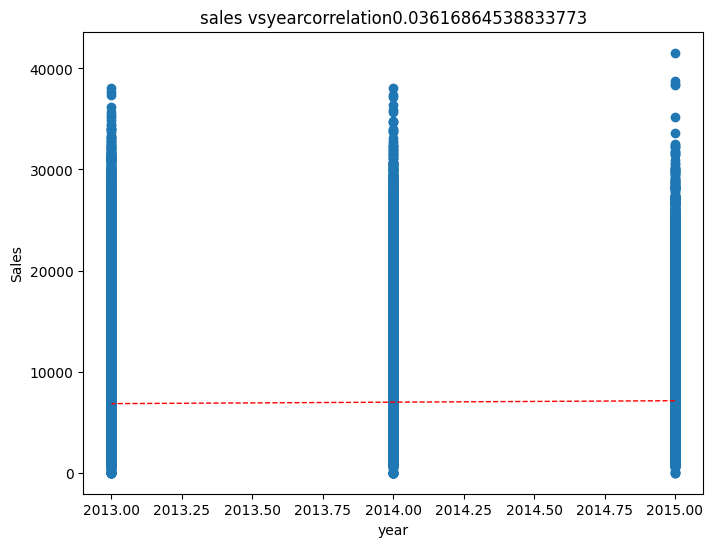

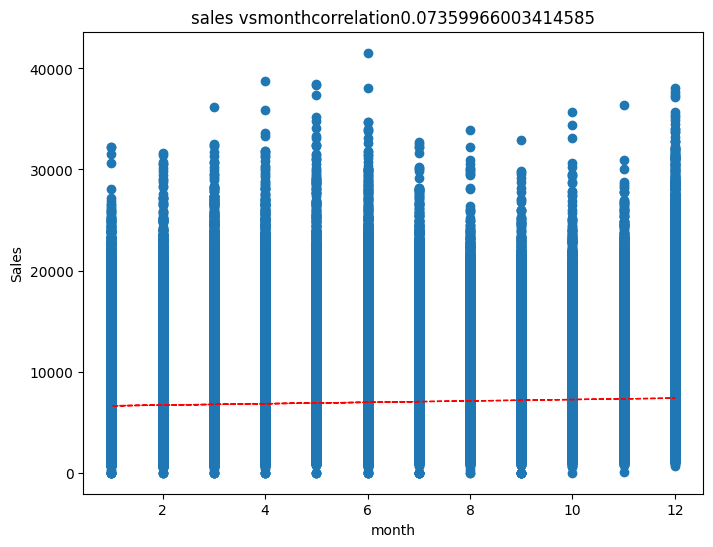

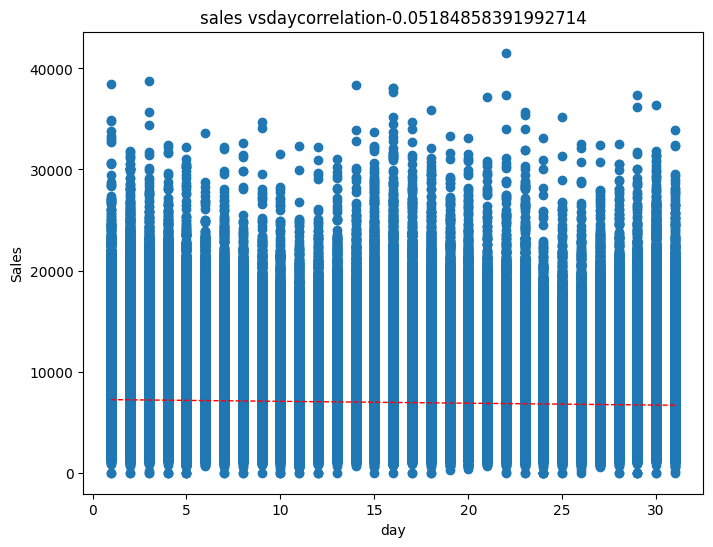

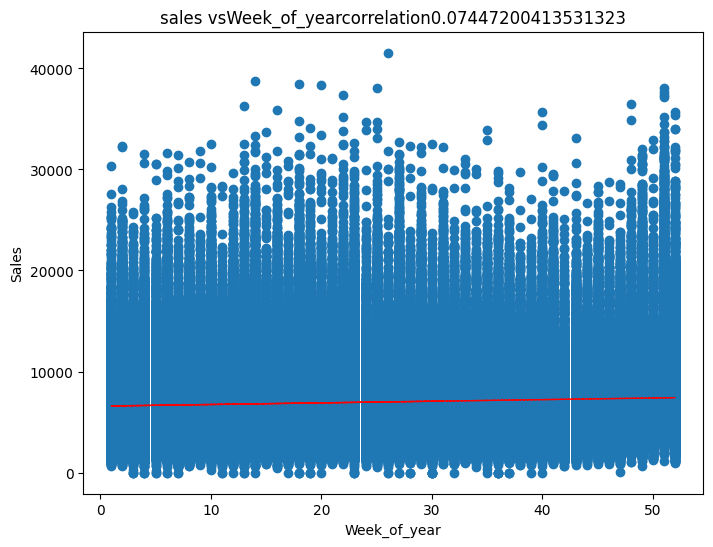

In [ ]:
for i in num_features:
  fig=plt.figure(figsize=(8,6))
  feature=new_ross_df[i]
  label=new_ross_df['Sales']

  # correlation coefficient
  correlation=feature.corr(label)

  # plot
  plt.scatter(feature,label)
  plt.xlabel(i)
  plt.ylabel('Sales')
  plt.title('sales vs'+i+'correlation'+str(correlation))

  # getting best fit line

  slope,intercept=np.polyfit(feature,label,1)
  plt.plot(feature,slope*feature+intercept, "r--", lw = 1)
plt.show()



In [ ]:
# loading store data
store_df=pd.read_csv('/content/drive/MyDrive/store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# shape of store data
store_df.shape

(1115, 10)

In [ ]:
# gives summary of store data
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
store_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [ ]:
store_df.duplicated().any()

False

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Figure size 3000x400 with 0 Axes>

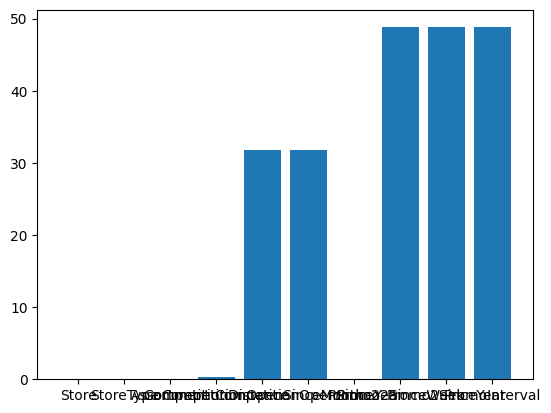

<Figure size 3000x400 with 0 Axes>

In [ ]:
# calculating missing value percentages
column=store_df.columns
missing_values=(store_df.isnull().sum()/len(store_df)*100)


plt.bar(missing_values.index,missing_values.values)
plt.figure(figsize=(30,4))

here we can observe that they are missing values and most of them are present in the CompetitionOpenSinceMonth,commpetitionOpenSinceYear,and
variables like Promo2SinceWeek,Promo2SinceYear and PromoInterval having 50% null values so we can drop these columns

#Data Wrangling

##Handling Missing values

<Figure size 800x600 with 0 Axes>

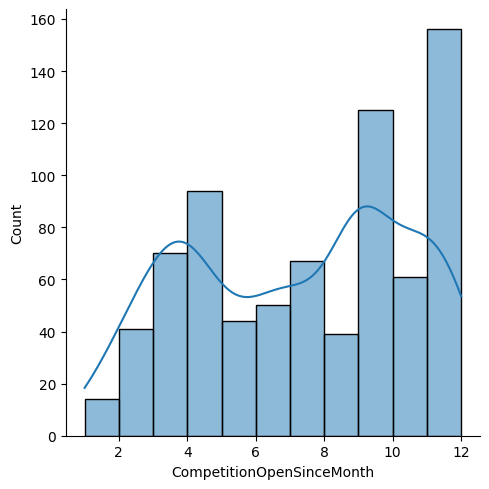

<Figure size 800x600 with 0 Axes>

In [ ]:
# plot the columns which has missing values
sns.displot(store_df['CompetitionOpenSinceMonth'],kde=True)
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

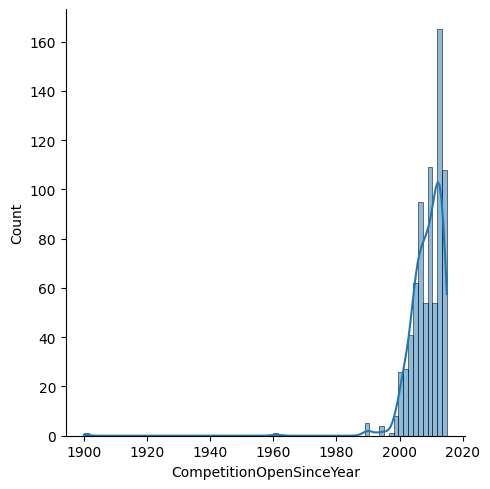

<Figure size 800x600 with 0 Axes>

In [ ]:
sns.displot(store_df['CompetitionOpenSinceYear'],kde=True)
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

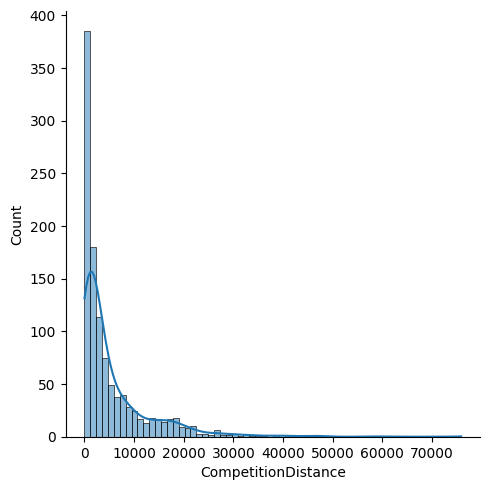

<Figure size 800x600 with 0 Axes>

In [ ]:
sns.displot(store_df['CompetitionDistance'],kde=True)
plt.figure(figsize=(8,6))

so,these graph shows the skewness, where to fill those null values we can use median central tendency but these are the cathegorical variables so instead of using median we use mode here

In [ ]:
#filling null values with mode
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0],inplace=True)
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)



In [ ]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mode()[0],inplace=True)

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
#droping unnecessary columns
columns_to_drop=['Promo2SinceWeek','Promo2SinceYear','PromoInterval']
store_df.drop(columns=columns_to_drop,axis=1,inplace=True)

In [ ]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

In [ ]:
store_df['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
store_df['Assortment'].unique()


array(['a', 'c', 'b'], dtype=object)

#merging both dataset

In [ ]:
# merging using left join
merged_data=pd.merge(new_ross_df,store_df,how='left')

In [ ]:
merged_data.head()


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,Week_of_year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,31,31,c,a,1270.0,9.0,2008.0,0
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,31,31,a,a,570.0,11.0,2007.0,1
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,31,31,a,a,14130.0,12.0,2006.0,1
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,31,31,c,c,620.0,9.0,2009.0,0
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,31,31,a,a,29910.0,4.0,2015.0,0


so here storetype and assortment are cathegorical variables,so we have to do encodinng here

In [ ]:
merged_data.shape

(844392, 18)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Promo                      844392 non-null  int64  
 6   StateHoliday               844392 non-null  int64  
 7   SchoolHoliday              844392 non-null  int64  
 8   year                       844392 non-null  int64  
 9   month                      844392 non-null  int64  
 10  day                        844392 non-null  int64  
 11  Week_of_year               844392 non-null  int64  
 12  StoreType                  844392 non-null  object 
 13  Assortment                 84

no missing values available here

In [ ]:
merged_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,844392.0,NaN,NaN,NaN,558.42292,321.731914,1.0,280.0,558.0,837.0,1115.0
DayOfWeek,844392.0,NaN,NaN,NaN,3.520361,1.723689,1.0,2.0,3.0,5.0,7.0
Date,844392,942,2014-04-16,1115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,844392.0,NaN,NaN,NaN,6955.514291,3104.21468,0.0,4859.0,6369.0,8360.0,41551.0
Customers,844392.0,NaN,NaN,NaN,762.728395,401.227674,0.0,519.0,676.0,893.0,7388.0
Promo,844392.0,NaN,NaN,NaN,0.446352,0.497114,0.0,0.0,0.0,1.0,1.0
StateHoliday,844392.0,NaN,NaN,NaN,0.001078,0.032811,0.0,0.0,0.0,0.0,1.0
SchoolHoliday,844392.0,NaN,NaN,NaN,0.19358,0.395103,0.0,0.0,0.0,0.0,1.0
year,844392.0,NaN,NaN,NaN,2013.831937,0.77726,2013.0,2013.0,2014.0,2014.0,2015.0
month,844392.0,NaN,NaN,NaN,5.845738,3.323931,1.0,3.0,6.0,8.0,12.0


In [ ]:
merged_data.duplicated().any()

False

we can observe the linearity between new variables

<Figure size 800x600 with 0 Axes>

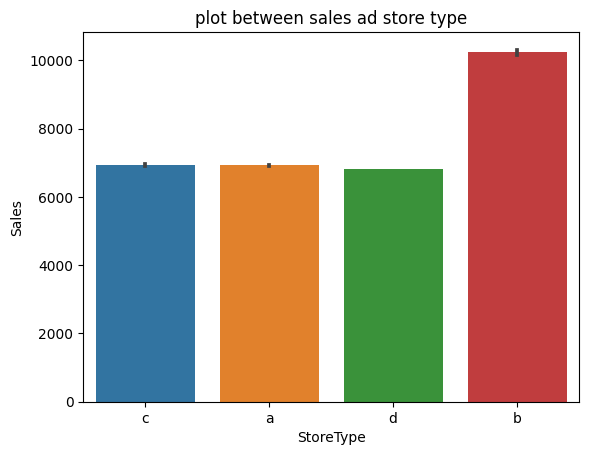

<Figure size 800x600 with 0 Axes>

In [ ]:
# plot between sales and store type
sns.barplot(x='StoreType',y='Sales',data=merged_data)
plt.title('plot between sales ad store type')
plt.figure(figsize=(8,6))


<Axes: xlabel='Assortment', ylabel='Sales'>

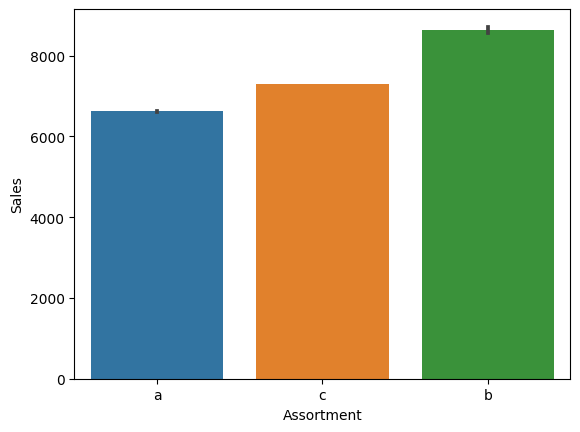

In [ ]:
# plot betwen  assortment and sales
sns.barplot(x='Assortment',y='Sales',data=merged_data)

<Axes: xlabel='Promo2', ylabel='Sales'>

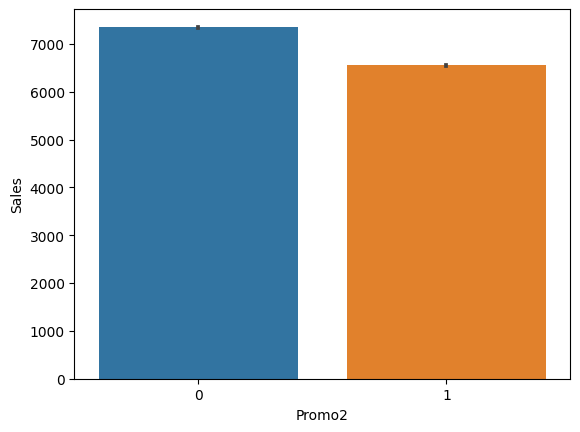

In [ ]:
sns.barplot(x='Promo2',y='Sales',data=merged_data)

<Axes: xlabel='CompetitionOpenSinceMonth', ylabel='Sales'>

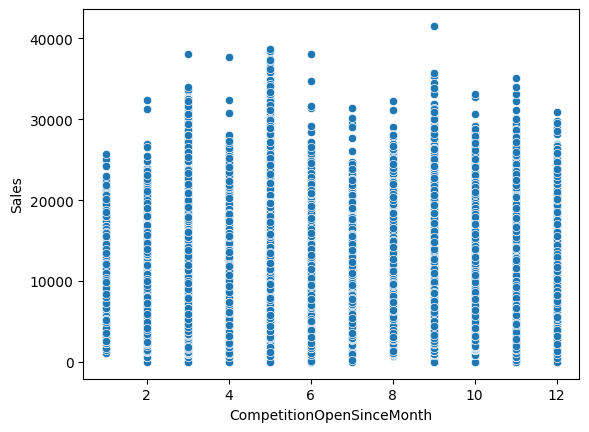

In [ ]:
# plot between sales and competition month and year
sns.scatterplot(x='CompetitionOpenSinceMonth',y='Sales',data=merged_data)

<Axes: title={'center': 'CompetitionOpenSinceMonth vs sales'}, xlabel='CompetitionOpenSinceMonth', ylabel='Sales'>

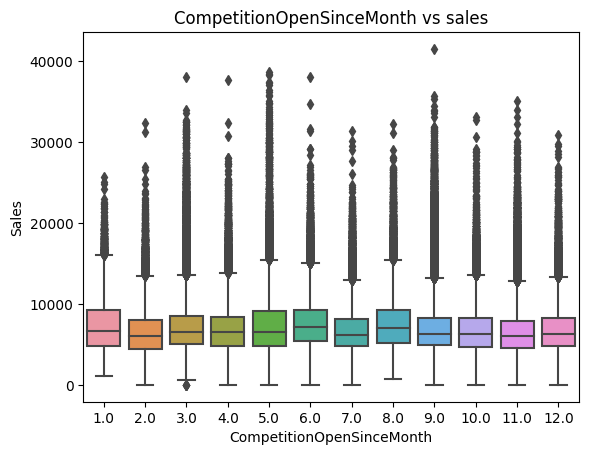

In [ ]:
plt.title('CompetitionOpenSinceMonth vs sales')
sns.boxplot(x='CompetitionOpenSinceMonth',y='Sales',data=merged_data)

EDA findings:  
The best-selling and most frequently visited by customers is store of type A.  
For all stores, promotion leads to increased sales and customers.  
Sales are strongly correlated to the number of customers.  
Stores open during school holidays have more sales than on normal days.  
Each time a store participates in a promotion, we see Sales and number of customers increase significantly.  
More stores are open during school holidays than on public holidays.  
Sales increase during Christmas week, this may be due to people buying gifts during a Christmas holidays.

checking for the multicollinearity

<ipython-input-57-38e29238714d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(),annot=True)


<Axes: title={'center': 'correlation between variables'}>

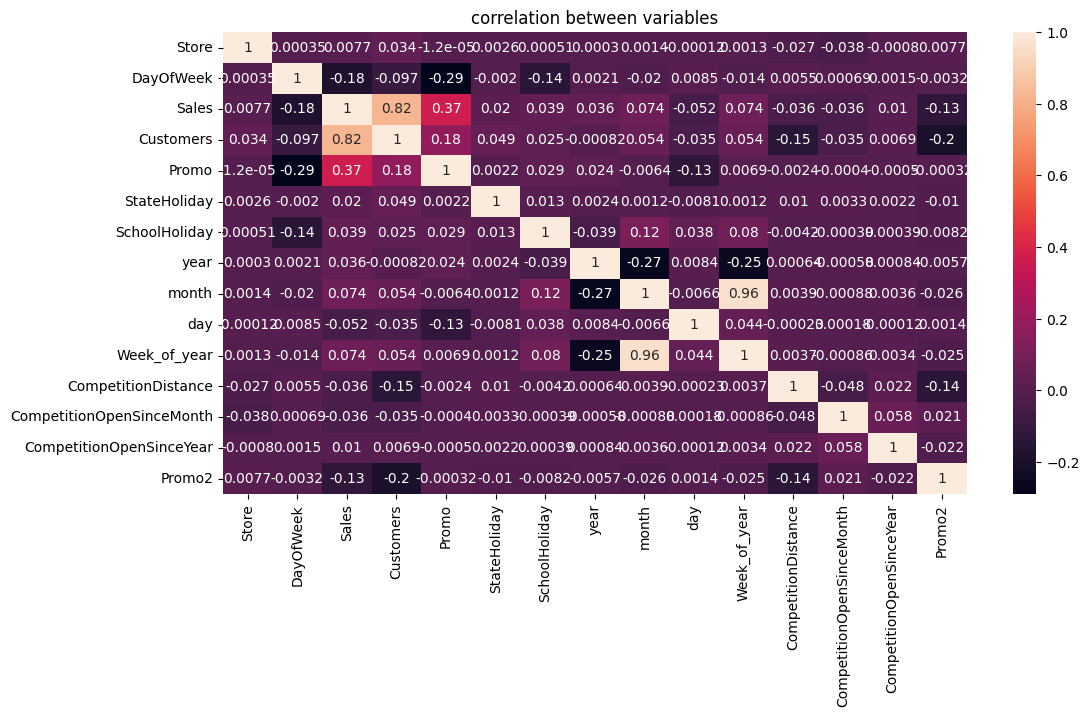

In [ ]:
plt.figure(figsize=(12,6))
plt.title('correlation between variables')
sns.heatmap(merged_data.corr(),annot=True)

#Label Encoding

assigning each of the following categorical columns an integer value based on alphhabetical order

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

merged_data['StoreType']=label_encoder.fit_transform(merged_data['StoreType'])
merged_data['Assortment']=label_encoder.fit_transform(merged_data['Assortment'])

merged_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,Week_of_year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,31,31,2,0,1270.0,9.0,2008.0,0
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,31,31,0,0,570.0,11.0,2007.0,1
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,31,31,0,0,14130.0,12.0,2006.0,1
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,31,31,2,2,620.0,9.0,2009.0,0
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,31,31,0,0,29910.0,4.0,2015.0,0


#variance inflation factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(x):
  vif=pd.DataFrame()
  vif['variables']=x.columns
  vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

  return(vif)



In [ ]:
calculate_vif(merged_data[[i for i in merged_data.describe().columns if i not in ['Sales']]])



,variables,VIF
0,Store,4.027186
1,DayOfWeek,5.770742
2,Customers,5.405042
3,Promo,2.077114
4,StateHoliday,1.004218
5,SchoolHoliday,1.307883
6,year,141232.139616
7,month,57.078753
8,day,4.585020
9,Week_of_year,51.268336


In [ ]:
# removing the features which having VIF>10
calculate_vif(merged_data[[i for i in merged_data.describe().columns if i not in ['Sales','year','CompetitionOpenSinceYear','month','Week_of_year']]])


,variables,VIF
0,Store,3.627383
1,DayOfWeek,4.513309
2,Customers,4.333250
3,Promo,1.945729
4,StateHoliday,1.003891
5,SchoolHoliday,1.247538
6,day,3.847937
7,StoreType,1.915873
8,Assortment,2.043605
9,CompetitionDistance,1.530801


In [ ]:
merged_data_vif=merged_data[[i for i in merged_data.describe().columns if i not in ['Sales','year','CompetitionOpenSinceYear','month','Week_Of_year']]].head()
merged_data_vif.head()

,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,day,Week_of_year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2
0,1,5,555,1,0,1,31,31,2,0,1270.0,9.0,0
1,2,5,625,1,0,1,31,31,0,0,570.0,11.0,1
2,3,5,821,1,0,1,31,31,0,0,14130.0,12.0,1
3,4,5,1498,1,0,1,31,31,2,2,620.0,9.0,0
4,5,5,559,1,0,1,31,31,0,0,29910.0,4.0,0


In [ ]:
# we can delete store id
merged_data_vif.drop('Store',axis=1,inplace=True)

In [ ]:
merged_data_vif.head()

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,day,Week_of_year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2
0,5,555,1,0,1,31,31,2,0,1270.0,9.0,0
1,5,625,1,0,1,31,31,0,0,570.0,11.0,1
2,5,821,1,0,1,31,31,0,0,14130.0,12.0,1
3,5,1498,1,0,1,31,31,2,2,620.0,9.0,0
4,5,559,1,0,1,31,31,0,0,29910.0,4.0,0


#ML modeling

In [ ]:
# importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor


In [ ]:
# importing metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


In [ ]:
# copy of a merged df
merged_df=merged_data.copy()

In [ ]:
# log transforming the sales
merged_df['Sales']=np.log10(merged_df['Sales'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# check for inf values
np.isinf(merged_df['Sales']).sum()

54

In [ ]:
# droping infinite values after transformation
merged_df.drop(merged_df[merged_df['Sales'] == float("-inf")].index,inplace=True)


In [ ]:
# log10 transformation values after transformation
merged_df['Customers']=np.log10(merged_df['Customers'])

In [ ]:
# checking for inf values
np.isinf(merged_df['Customers']).sum()

0

In [ ]:
# declaring the dependent variables and independent variables
dependent_var='Sales'
independent_var=merged_data_vif.columns

In [ ]:
independent_var

Index(['DayOfWeek', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'day', 'Week_of_year', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'Promo2'],
      dtype='object')

In [ ]:
# creating a dataframe of independent variables and dependent variables
X=merged_df[independent_var].values
Y=merged_df[dependent_var].values

In [ ]:
# splitting te dataset in train and test
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(675470, 12)
(168868, 12)


In [ ]:
# using standard scaler to normalize the independent variables
scaler=StandardScaler()
scaled_x_train=scaler.fit_transform(X_train)
scaled_x_test=scaler.transform(X_test)

#Linear Regression

In [ ]:
# fitting multiple linnear regression to the trainnig dataset
regressor=LinearRegression()
regressor.fit(scaled_x_train,Y_train)

LinearRegression()

In [ ]:
# interccept of the equation
regressor.intercept_

3.8034514686890684

In [ ]:
# model coefficients
regressor.coef_

array([-0.00313192,  0.15986643,  0.03455229, -0.00316666,  0.00103942,
        0.00016845,  0.00357024,  0.03184004,  0.01031049,  0.01544537,
       -0.00176485,  0.01310904])

In [ ]:
# predicted sales from training dataset
y_pred_train=regressor.predict(scaled_x_train)

# predcting sales from testing dataset
y_pred_test=regressor.predict(scaled_x_test)

In [ ]:
# defining RMSE fun
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(X,Y):
  return sqrt(mean_squared_error(X,Y))

# defining MAPE fun
def mape(X,Y):
  return np.mean(np.abs((X-Y)/X))*100

In [ ]:
# evaluation metrics for linear regression

print("Regresion Model Training Score" , ":" , regressor.score(scaled_x_train, Y_train),
      "Model Test Score" ,":" , regressor.score(scaled_x_test, Y_test))

print("Training RMSE", ":", rmse(Y_train, y_pred_train),
      "Testing RMSE", ":", rmse(Y_test, y_pred_test))

print("Training MAPE", ":", mape(Y_train, y_pred_train),
      "Testing MAPE", ":", mape(Y_test, y_pred_test))

r2 = r2_score(Y_test, y_pred_test)
print("R2 :" ,r2)

Regresion Model Training Score : 0.8196642980814024 Model Test Score : 0.8195157780790712
Training RMSE : 0.07839989278761479 Testing RMSE : 0.07859686859295877
Training MAPE : 1.6059905872941138 Testing MAPE : 1.6081788996210031
R2 : 0.8195157780790712


In [ ]:
import math

In [ ]:
# performance of a model
r2s_lr=r2_score(Y_train,y_pred_train)
r2s2_lr=r2_score(Y_test,y_pred_test)
print('r2_score train:',r2s_lr)
print('r2_score test:',r2s_lr)

mae_lr=mae(Y_train,y_pred_train)
mae2_lr=mae(Y_test,y_pred_test)
print('mae train:',mae_lr)
print('mae2_lr:',mae2_lr)

rmse_lr=math.sqrt(mse(Y_train,y_pred_train))
rmse2_lr=math.sqrt(mse(Y_test,y_pred_test))
print('rmse train:', rmse_lr)
print('rmse2 test:',rmse2_lr)

mse_lr=mse(Y_train,y_pred_train)
mse2_lr=mse(Y_test,y_pred_test)
print('mse train:',mse_lr)
print('mse2 test:',mse2_lr)


r2_score train: 0.8196642980814024
r2_score test: 0.8196642980814024
mae train: 0.06091428745815559
mae2_lr: 0.060994148297223744
rmse train: 0.07839989278761479
rmse2 test: 0.07859686859295877
mse train: 0.0061465431891094945
mse2 test: 0.006177467752618828


Text(0, 0.5, 'Predicted values')

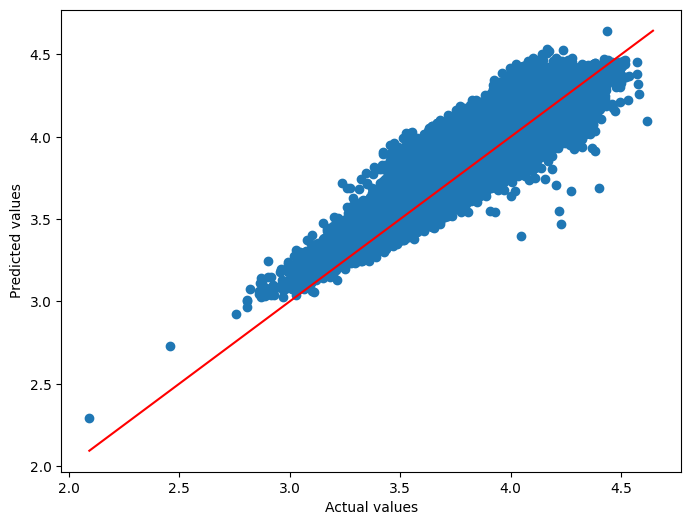

In [ ]:
# showing the optimal fitted line
plt.figure(figsize=(8,6))
plt.scatter(Y_test,y_pred_test)
p1 = max(max(y_pred_test),max(Y_test))
p2 = min(min(y_pred_test),min(Y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

#Elastic Net Regression

In [ ]:
# elastic net
elasticnet=ElasticNet(alpha=0.1,l1_ratio=0.5)

In [ ]:
# model  fitting
elasticnet.fit(scaled_x_train,Y_train)


ElasticNet(alpha=0.1)

In [ ]:
# Elastic score
elasticnet.score(scaled_x_train,Y_train)


0.6394617895673739

In [ ]:
# predicting test set
y_pred_en=elasticnet.predict(scaled_x_test)


In [ ]:
MSE=mse(Y_test,y_pred_en)
print('mse:',MSE)

RMSE=rmse(Y_test,y_pred_en)
print('rmse:',RMSE)

r2=r2_score(Y_test,y_pred_en)
print('r2:',r2)

mse: 0.012318562564571395
rmse: 0.11098902001806933
r2: 0.6400942475647211


#GridSearchCV for Elastic Net Regression

In [ ]:
# hyperparameter  tuining for elastic net
elastic=ElasticNet()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor=GridSearchCV(elastic,parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(scaled_x_train,Y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
# predicted values after hyperparameter tuining
y_pred_elastic=elastic_regressor.predict(scaled_x_test)
print('the best fit alpha value is found out to be :' ,elastic_regressor.best_params_)


the best fit alpha value is found out to be : {'alpha': 1e-13, 'l1_ratio': 0.4}


In [ ]:
# model performance metrics
MSE=mse(Y_test,y_pred_elastic)
print('mse:',MSE)

RMSE=np.sqrt(MSE)
print('rmse', RMSE)

r2=r2_score(Y_test,y_pred_test)
print('r2:',r2)

mse: 0.00617746775261879
rmse 0.07859686859295853
r2: 0.8195157780790712


#XGBoost Model

In [ ]:
# declaring independent and dependent variables
target_col='Sales'
input_cols=merged_df.columns.drop(target_col)
input_cols


Index(['Store', 'DayOfWeek', 'Date', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'year', 'month', 'day', 'Week_of_year', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2'],
      dtype='object')

In [ ]:
# train test split
X_train,X_test,y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((675470, 12), (168868, 12), (675470,), (168868,))

In [ ]:
# standard scaler to normalize the data
scaler=StandardScaler()
scaler_X_train=scaler.fit_transform(X_train)
scaler_X_test=scaler.transform(X_test)
scaler_X_train[0:10]

array([[ 0.85796381, -0.56766205, -0.89823874, -0.03232349, -0.48983027,
         0.01953232, -0.25395831,  1.31559964, -0.94318335,  1.69538147,
         1.51647427, -0.99750707],
       [ 0.2780685 , -0.77630999, -0.89823874, -0.03232349, -0.48983027,
        -0.78675406,  0.30146449,  1.31559964,  1.07054741, -0.13789041,
         0.43537047, -0.99750707],
       [ 0.2780685 ,  0.41004927,  1.11328977, -0.03232349, -0.48983027,
         1.28655377,  1.6900215 , -0.88453989,  1.07054741, -0.67761591,
        -0.28536539, -0.99750707],
       [ 0.85796381,  1.38102682,  1.11328977, -0.03232349, -0.48983027,
        -1.24748914,  0.85688729, -0.88453989,  1.07054741, -0.6609498 ,
         0.43537047,  1.00249916],
       [ 1.43785912, -0.27736522, -0.89823874, -0.03232349, -0.48983027,
        -1.70822421, -1.01766467,  1.31559964, -0.94318335, -0.54428705,
         0.43537047,  1.00249916],
       [ 0.85796381,  1.80512534, -0.89823874, -0.03232349,  2.04152347,
        -0.09565145, -

In [ ]:
# buildig xgboost regressor model
xgb=XGBRegressor(random_state=42,n_jobs=-1, n_estimators=20, max_depth=4)
xgb.fit(scaler_X_train,y_train)

y_predict_xgb=xgb.predict(scaler_X_test)

In [ ]:
# performance of model
r2s_xgb=r2_score(Y_test,y_predict_xgb)
print('r2:',r2s_xgb)

mae_xgb=mae(Y_test,y_predict_xgb)
print('mae:',mae_xgb)

rmse_xgb=math.sqrt(mse(Y_test,y_predict_xgb))
print('rmse:',rmse_xgb)

r2: 0.8849366241203271
mae: 0.04942427065852599
rmse: 0.06275584455903019


#Decision Tree Model


In [ ]:
# building decision tree regressor model
model =DecisionTreeRegressor()
model.fit(scaler_X_train,y_train)

y_predict_dt=model.predict(scaler_X_test)

In [ ]:
# performance of model
r2s_3=r2_score(Y_test,y_predict_dt)
print('r2s:',r2s_3)

mae_3=mae(Y_test,y_predict_dt)
print('mae:',mae_3)

rmse_3=math.sqrt(mse(Y_test,y_predict_dt))
print(rmse_3)

r2s: 0.9460868884222936
mae: 0.03133538229608381
0.04295688899983351


#Random Forest Regression Model

In [ ]:
# building random tree regressor model
random_forest_model=RandomForestRegressor(n_estimators=100)
random_forest_model.fit(scaler_X_train,y_train)

y_predict_rf=random_forest_model.predict(scaler_X_test)


In [ ]:
# performance of model
r2s_4=r2_score(Y_test,y_predict_rf)
print('r2:',r2s_4)

mae_4=mae(Y_test,y_predict_rf)
print('mae:',mae_4)

rmse_4=rmse(Y_test,y_predict_rf)
print('rmse:',rmse_4)


r2: 0.9719028708245283
mae: 0.022807113318238804
rmse: 0.03101105896717069


#Hyperparameter tuining for Random forest

In [ ]:
# hyperparamter tuining
from sklearn.model_selection import GridSearchCV

param_grid={'bootstrap':[True],'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rfr=RandomForestRegressor(random_state=1)
g_search=GridSearchCV(estimator=rfr,param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(scaler_X_train,y_train);

print(g_search.best_params_)


In [ ]:
# model prediction train test
y_pred_RandomForest_tuned_train=g_search.predict(scale_X_train)


In [ ]:
# model prediction test set
y_pred_RandomForest_tuned_test=g_search.predict(scale_X_test)


In [ ]:
print("Regresion Model Training Score" , ":" , g_search.score(scale_X_train, y_train),
      "Model Test Score" ,":" , g_search.score(scale_X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_RandomForest_tuned_train),
      "Testing RMSE", ":", rmse(y_test, y_pred_RandomForest_tuned_test))

print("Training MAPE", ":", mape(y_train, y_pred_RandomForest_tuned_train),
      "Testing MAPE", ":", mape(y_test, y_pred_RandomForest_tuned_test))

r2 = r2_score(y_test, y_pred_RandomForest_tuned_test)
print("R2 :" ,r2)


Feature Importance

In [ ]:
# lets find importance of each feature
feature_importance=random_forest_model.feature_importances_


In [ ]:
# lets make a dataframe consists of features and values
columns_1=list(X_train.columns)
feature_importance_df = pd.DataFrame({'Features':columns_1, 'Importance':feature_importance})
feature_importance_df.set_index('Features', inplace=True)
feature_importance_df.sort_values(by= 'Importance', ascending = False, inplace = True)
feature_importance_df

In [ ]:
# Feature Importance
Features_imp = feature_importance_df.index

plt.figure(figsize=(15,12))
sns.barplot(y= Features_imp, x=feature_importance_df['Importance'], data = feature_importance_df ).set(title='Feature Importance')
plt.xticks(rotation=90)
plt.show()

#Observation
As per our model; Customer, store Type, CompetitionDistance and Promo are the most important features which are having the most impact on Target Variable i.e. Sales Column.

#Conclusion
By Looking at the evaluation metrices obtained on implementing different sort of regression model, we decided to go with the Random Forest Tuned model.The maximum R^2 was seen in tuned Random Forest model with the value 0.97185. It means our best accurate model is able to explain approx/almost 97% of variances in the datasets.  

Based on our model; Customer, store Type, Promo & CompetitionDistance are the most impactful features which are driving the sales more as compared to other features present in the dataset.